# Analysis

## Loading Modules

In [1]:
include("../src/ModuleLEPEE.jl")
using .ModuleLEPEE
using Plots
using StatsBase
using HDF5
using StatsPlots


## Loading Data

In [2]:

folder = "../data/PreData/";
f=h5open(joinpath(folder, "predata.h5"),"r");



fields = keys(f)
println(fields)

for field in fields
    println(length(keys(f[field])))
end


#HGT Denmark
#RET  Sweden
#TRVJ Glasgow



["HGTQDYRUXK", "RETBSFZUZJ", "TRVJCDWMRI"]
13
7
10


Plot sample

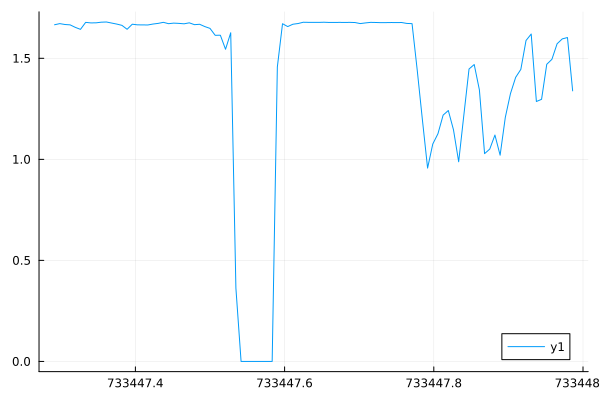

[0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.006944444379769266, 0.0069444444961845875, 0.0069

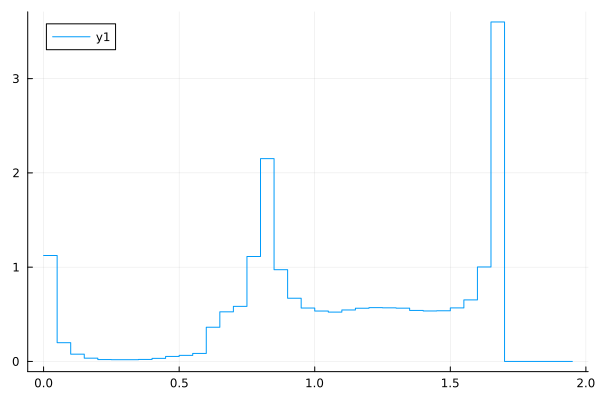

In [3]:
using StatsBase;

fig_hist = plot()

field=fields[3]
blade=keys(f[field])[1]
plot!(fig_hist,f[field][blade]["AngularSpeed"]["time"][1000:1100],f[field][blade]["AngularSpeed"]["value"][1000:1100])
display(fig_hist)

println(diff(f[field][blade]["AngularSpeed"]["time"][1000:1100]))

print("minimum: ")
println(f[field][blade]["AngularSpeed"]["time"][1])
print("maximum: ")
println(f[field][blade]["AngularSpeed"]["time"][end])

histogram(f[field][blade]["AngularSpeed"]["value"][:])


fig_hist = plot()
h1 = fit(Histogram,f[field][blade]["AngularSpeed"]["value"][:],0:0.05:2)
ang_speed = collect(h1.edges[1][1:end-1]);
freq_ang = h1.weights; 
freq_ang = freq_ang / ((sum(freq_ang)*0.05))
println(freq_ang)
println(ang_speed)
plot!(fig_hist,ang_speed,freq_ang,linetype=:steppost )
display(fig_hist)



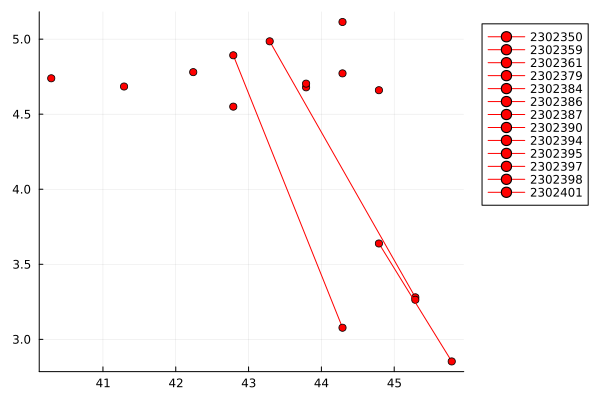

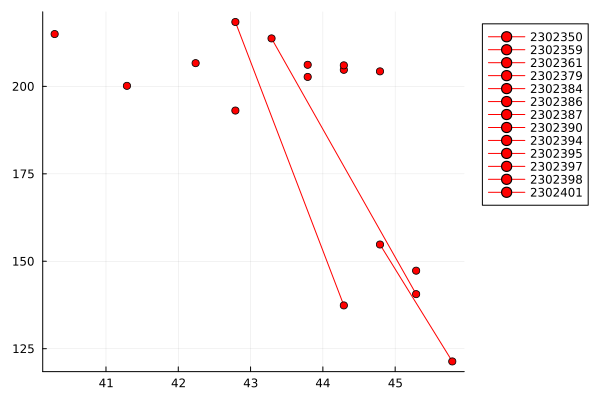

In [13]:


#field=fields[1];
#blades=keys(f[field])
m=1:1:10

dsdbestDenmark(diameter) = dsdBest(diameter, T=772.03, mu=-2.37, sigma=1.55);
dsdbestSweden(diameter) = dsdBest(diameter, T=629.34, mu=-2.66, sigma=1.55);
dsdbestGlasgow(diameter) = dsdBest(diameter, T=1383.05, mu=-2.23, sigma=1.5);

dsd=Dict(keys(f)[1] => dsdbestDenmark, keys(f)[2] => dsdbestSweden, keys(f)[3] =>dsdbestGlasgow);
colors=Dict(keys(f)[1] => :red, keys(f)[2] => :blue, keys(f)[3] => :green);

plot_points = plot(legend=:outertopright);
plot_point_corr = plot(legend=:outertopright);

pointsR=Float64[]
pointsLTC=Float64[]
pointsLT=Float64[]

for field in fields[[1]]
    blades = keys(f[field])
    Cr = Cr_dsd(dsd[field])
    for blade in blades
        #println(keys(f[field][blade]))

        if (length(f[field][blade]["R"][:]) >= 1)

            plot!(plot_points, f[field][blade]["R"][:], f[field][blade]["LT"][:], seriestype=:path, marker=:circle, label=blade, color=colors[field])

            angSpeed_data = filter(!isnan, f[field][blade]["AngularSpeed"]["value"][:])
            #println(length(angSpeed_data))

            h2 = fit(Histogram, angSpeed_data, 0:0.01:5)
            #angSpeed = (collect(h2.edges[1][1:end-1]) + collect(h2.edges[1][2:end])) / 2
            #freq_angSpeed = h2.weights
            whist = Cw_Hist(1.9, collect(h2.edges[1]), h2.weights)
            #println(whist)

            plot!(plot_point_corr, f[field][blade]["R"][:], f[field][blade]["LT"][:] * whist * Cr, seriestype=:path, marker=:circle, label=blade, color=colors[field])
            pointsR = append!(pointsR, f[field][blade]["R"][:])
            pointsLTC = append!(pointsLTC, f[field][blade]["LT"][:] * whist * Cr)
            pointsLT = append!(pointsLT, f[field][blade]["LT"][:])
        end

    end
end
display(plot_points)
display(plot_point_corr)

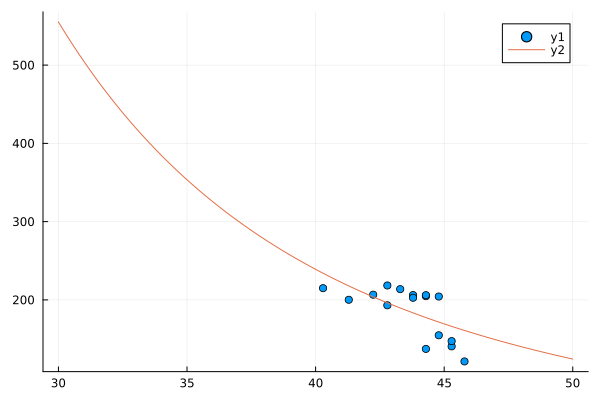

m = 1.9280775554684437
M = 1.1573721983363792e7
Radius = [40.29, 42.79, 44.29, 41.29, 44.29, 42.79, 45.29, 43.29, 45.29, 43.79, 44.29, 43.79, 44.79, 45.79, 42.24, 44.79]
LT = [4.7392, 4.5503, 5.1143, 4.6844, 3.0773, 4.8925, 3.2799, 4.9856, 3.2635, 4.6789, 4.772, 4.7036, 3.6386, 2.8528, 4.7802, 4.6598]
LTC = [214.96222188779242, 193.09089951126774, 204.73820581368253, 200.15661792208883, 137.37717428784353, 218.41153777768642, 140.60135477536008, 213.72057512974027, 147.3054445345001, 206.17277656039357, 206.0178171888132, 202.7073573848449, 154.7895657619909, 121.36087319458244, 206.64559152878434, 204.2967886172668]
x = [30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.0, 33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35.0, 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36.0, 36.1

In [22]:
plot_fit = plot()


ind = (pointsR .> 0)

res=fit_curve(pointsLTC[ind],pointsR[ind])
a=res.minimizer[1]
b=res.minimizer[2]

m = -res.minimizer[2] - 1
println("m = ",m)
M = res.minimizer[1] * (365*24*60*60) / 8.9
M = M ^ (1/m)
println("M = ",M)

plot!(plot_fit, pointsR, pointsLTC, seriestype = :scatter)

x=collect(30:0.1:50)
plot!(plot_fit,x,a.*(x.^b))
display(plot_fit)

println("Radius = ",pointsR)
println("LT = ",pointsLT)
println("LTC = ", pointsLTC)
println("x = ",x)
println("y = ", a.*(x.^b))


1.9280775554684437
15.228190858493143
2.870728361880495
13.864671018085028
2.1226933564868276
27.233337801116136
2.006484387832211
[40.29, 42.79, 44.29, 41.29, 44.29, 42.79, 45.29, 43.29, 45.29, 43.79, 44.29, 43.79, 44.79, 45.79, 42.24, 44.79, 44.29, 44.29, 45.29, 45.29, 46.29, 42.29, 44.29, 40.29, 40.29, 41.29, 34.29, 41.29, 38.29, 40.29, 41.29, 41.29, 38.29]
[4.7392, 4.5503, 5.1143, 4.6844, 3.0773, 4.8925, 3.2799, 4.9856, 3.2635, 4.6789, 4.772, 4.7036, 3.6386, 2.8528, 4.7802, 4.6598, 5.5879, 5.5742, 5.6547, 5.5934, 5.5961, 5.6947, 5.4674, 5.1964, 6.1546, 5.3223, 5.1718, 5.1718, 6.3107, 5.1608, 5.1197, 5.1937, 5.2758]
Any["HGTQDYRUXK", "HGTQDYRUXK", "HGTQDYRUXK", "HGTQDYRUXK", "HGTQDYRUXK", "HGTQDYRUXK", "HGTQDYRUXK", "HGTQDYRUXK", "HGTQDYRUXK", "HGTQDYRUXK", "HGTQDYRUXK", "HGTQDYRUXK", "HGTQDYRUXK", "RETBSFZUZJ", "RETBSFZUZJ", "RETBSFZUZJ", "RETBSFZUZJ", "RETBSFZUZJ", "RETBSFZUZJ", "RETBSFZUZJ", "TRVJCDWMRI", "TRVJCDWMRI", "TRVJCDWMRI", "TRVJCDWMRI", "TRVJCDWMRI", "TRVJCDWMRI", "TRVJ

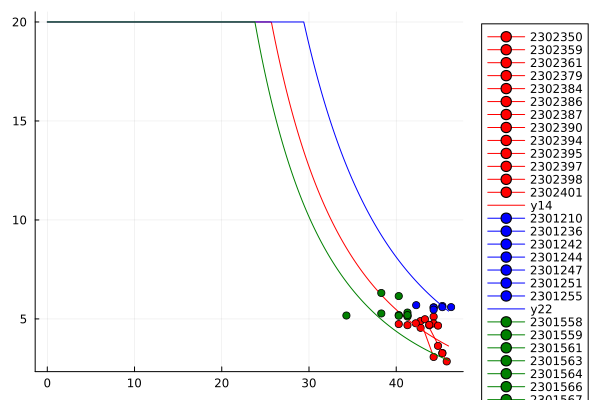

In [26]:
println(m)
fig_fit_field=plot(legend=:outertopright)

fullpointsR=Float64[]
fullpointsLT=Float64[]
fullpointsField=[]
fullfiting=[]


for field in fields
    blades = keys(f[field])
    Cr = Cr_dsd(dsd[field])
    println(Cr);
    cw = []
    for blade in blades
        angSpeed_data = filter(!isnan, f[field][blade]["AngularSpeed"]["value"][:])

        h2 = fit(Histogram, angSpeed_data, 0:0.01:5)
        #angSpeed = (collect(h2.edges[1][1:end-1]) + collect(h2.edges[1][2:end])) / 2
        #freq_angSpeed = h2.weights
        whist = Cw_Hist(m, collect(h2.edges[1]), h2.weights)
        cw = append!(cw,whist)

        plot!(fig_fit_field, f[field][blade]["R"][:], f[field][blade]["LT"][:] , seriestype=:path, marker=:circle, label=blade, color=colors[field])        
        fullpointsR=append!(fullpointsR,f[field][blade]["R"][:])
        fullpointsLT=append!(fullpointsLT,f[field][blade]["LT"][:])
        fullpointsField=push!(fullpointsField,field)
    end

    Cw = median(cw)
    println(Cw);

    x=0:0.1:46
    y=8.9*(M^m)*(x.^(-m-1))/Cr/Cw/(365*24*60*60)
    y=clamp.(y,0,20);
    fullfiting=push!(fullfiting,y)
    plot!(fig_fit_field,x,y,color=colors[field])

end

display(fig_fit_field)
println(fullpointsR)
println(fullpointsLT)
println(fullpointsField)
println(x)
println(fullfiting[1])
println(fullfiting[2])
println(fullfiting[3])
